In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

# 소수 셋째 자리로 출력 옵션 설정
np.set_printoptions(precision=3, linewidth=200)

# Tokenize and Embedding

['i', 'love', 'you', 'so', 'much']
[7, 9, 3, 8, 6]


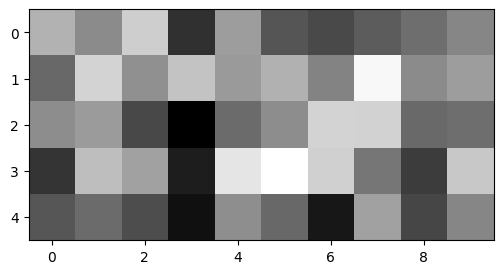

In [2]:
np.random.seed(0)

vocab = [
    'man',
    'woman',
    'human',
    'you',
    'she',
    'he',
    'much',
    'i',
    'so',
    'love',
    'Le',
    'chat',
    'est',
    'sur',
    'le',
    'tapis',
    'the',
    'cat',
    'is',
    'on',
    'mat',
    '<START>',
    '<END>',
    '<PAD>'
]

d_model = 10
embeddings = np.random.randn(len(vocab)*d_model).reshape(len(vocab), d_model)

class Tokenizer:
    def __init__(self, V):
        # 토큰 10개짜리 vocabulary
        self.vocab = V

    def tokenize(self, sample):
        return sample.split(' ')

    def encode(self, x):
        output = {}
        output['tokens'] = self.tokenize(x)
        output['ids'] = [self.vocab.index(t) for t in output['tokens']]

        return output

# 샘플 문장
x = "i love you so much"

# 토큰화, sentence -> tokens -> token ids
tokenizer = Tokenizer(vocab)
output = tokenizer.encode(x)
print(output['tokens'])
print(output['ids'])

# 임베딩, token ids -> embedding vectors
embedded_x = embeddings[output['ids']]

plt.figure(figsize=(6,3))
plt.imshow(embedded_x, aspect='auto', cmap='gray')
plt.show()

# Positional Encoding

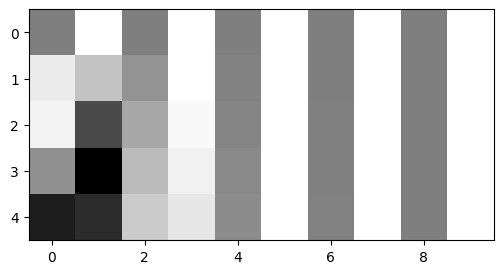

In [3]:
# Positional Encoding
seq_length = len(embedded_x)

PE = np.zeros((seq_length, d_model))
for pos in range(seq_length):
    for i in range(d_model//2):
        PE[pos, 2*i]   = np.sin( pos / (10000**(2*i/d_model)) )
        PE[pos, 2*i+1] = np.cos( pos / (10000**(2*i/d_model)) )

plt.figure(figsize=(6,3))
plt.imshow(PE, aspect='auto', cmap='gray')
plt.show()

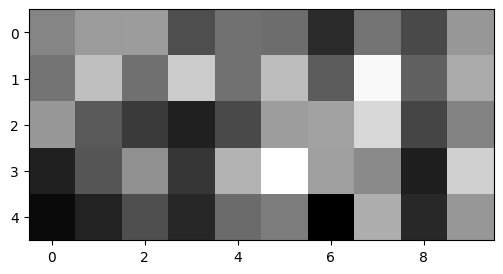

In [4]:
embedded_x = embedded_x + PE
plt.figure(figsize=(6,3))
plt.imshow(embedded_x, aspect='auto', cmap='gray')
plt.show()

# Recap Matrix Multiplication

## linear combination of rows

In [5]:
import numpy as np

# 예제 행렬
A = np.array([[1, 2, 3],
              [3, 2, 1],
              [1, 3, 2]])
B = np.array([[10, 10, 10, 10, 10],
              [20, 20, 20, 20, 20],
              [30, 30, 30, 30, 30]])

# 행렬 곱
C = np.dot(A, B)

# 선형 조합으로 계산한 결과를 저장할 배열
C_linear_combination = np.zeros_like(C)

# 선형 조합을 통해 결과를 계산
for i in range(A.shape[0]):
    A_row = A[i]
    for j in range(len(A_row)):
        C_linear_combination[i] += A_row[j] * B[j]

# 결과 출력
print("A:")
print(A)
print("\nB:")
print(B)
print("\nC = A * B (numpy dot):")
print(C)
print("\nC = A * B (linear combination):")
print(C_linear_combination)


A:
[[1 2 3]
 [3 2 1]
 [1 3 2]]

B:
[[10 10 10 10 10]
 [20 20 20 20 20]
 [30 30 30 30 30]]

C = A * B (numpy dot):
[[140 140 140 140 140]
 [100 100 100 100 100]
 [130 130 130 130 130]]

C = A * B (linear combination):
[[140 140 140 140 140]
 [100 100 100 100 100]
 [130 130 130 130 130]]


# Self Attention

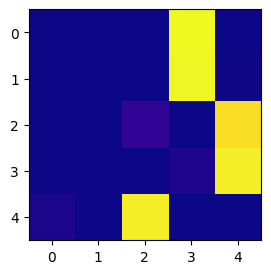

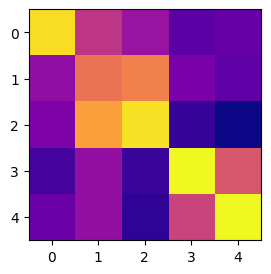

In [6]:
from scipy.special import softmax

np.random.seed(0)

d_k = d_v = d_model

W_q = np.random.randn(d_model, d_k)
W_k = np.random.randn(d_model, d_k)
W_v = np.random.randn(d_model, d_v)

Q = np.dot(embedded_x, W_q)
K = np.dot(embedded_x, W_k)
V = np.dot(embedded_x, W_v)

p_attn = softmax(np.dot(Q, K.T) / np.sqrt(d_k), axis=1)

plt.figure(figsize=(3,3))
plt.imshow(p_attn, aspect='auto', cmap='plasma')
plt.show()

p_attn_  = p_attn.copy()

# W_q, W_k, W_v가 잘 학습되었다면...
p_attn = softmax(
    np.array(
    [
        [0.73, 0.4,  0.3,  0.15, 0.18],
        [0.4,  0.67, 0.7,  0.34, 0.28],
        [0.3,  0.7,  0.8,  0.12, 0.03],
        [0.15, 0.34, 0.12, 0.82, 0.54],
        [0.18, 0.28, 0.03, 0.43, 0.76]
    ]),
    axis=1
)

plt.figure(figsize=(3,3))
plt.imshow(p_attn, aspect='auto', cmap='plasma')
plt.show()

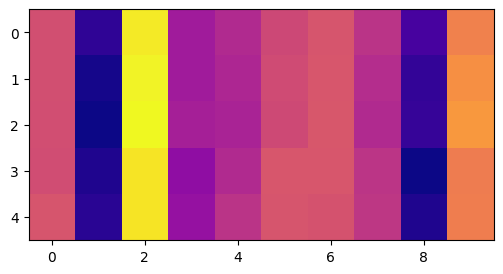

In [7]:
embedded_x_attn = np.dot(p_attn, V)

plt.figure(figsize=(6,3))
plt.imshow(embedded_x_attn, aspect='auto', cmap='plasma')
plt.show()

In [8]:
K_torch = torch.randn(3, 6)
V_torch = torch.randn(3, 6)
Q_torch = torch.randn(5, 8)

embed_dim = 8
num_heads = 1

multihead_attn = nn.MultiheadAttention(embed_dim, num_heads, kdim=6, vdim=6)
attn_output, attn_output_weights = multihead_attn(Q_torch, K_torch, V_torch)


In [9]:
attn_output_weights

tensor([[0.2541, 0.6964, 0.0495],
        [0.1422, 0.7783, 0.0795],
        [0.1956, 0.6906, 0.1138],
        [0.1864, 0.5614, 0.2522],
        [0.1580, 0.0743, 0.7677]], grad_fn=<SqueezeBackward1>)

In [10]:
attn_output

tensor([[-0.0646, -0.3253,  0.0924,  0.2543, -0.0602, -0.5022, -0.4498,  0.5450],
        [-0.0825, -0.3047,  0.0993,  0.3487, -0.0454, -0.4811, -0.4305,  0.5832],
        [-0.0773, -0.2595,  0.0940,  0.3047, -0.0478, -0.4595, -0.4075,  0.5557],
        [-0.0883, -0.1037,  0.0888,  0.3155, -0.0334, -0.3690, -0.3159,  0.5327],
        [-0.1282,  0.4772,  0.0691,  0.3508,  0.0194, -0.0323,  0.0249,  0.4451]],
       grad_fn=<SqueezeBackward1>)

# Normalization

## Batch Normalization

In [11]:
# 배치사이즈 3, 단어 세 개로 구성된 문장, feature 4
np.random.seed(0)
torch.manual_seed(0)


x = torch.randn(3, 3, 4)
pad_embedding = torch.randn(4)
x[0,1:] = pad_embedding
x[2,2:,:] = pad_embedding
print('\nINPUT', x.shape)
print(x)

#===================
# batch norm.
# pytorch
bnorm = nn.BatchNorm1d(x.shape[1])
print('\nPYTORCH BATCH NORM. 1D')
print("    gamma & beta")
print("   ", bnorm.weight.shape, bnorm.bias.shape)
print("    mean & var")
print("   ", bnorm.running_mean.shape, bnorm.running_var.shape)
print("    result")
print(bnorm(x))

# 직접 만들기
mean = x.mean(axis=(0,2))
var = x.var(axis=(0,2), unbiased=False)
gamma = torch.ones(x.shape[1]) # feature 수와 일치 나머지 차원에는 브로드 캐스팅
beta = torch.zeros(x.shape[1]) # feature 수와 일치 나머지 차원에는 브로드 캐스팅
print('\nMY BATCH NORM.')
print("    gamma & beta")
print("   ", gamma.shape, beta.shape)
print("    mean & var")
print("   ", mean.shape, var.shape)
print("    result")
print(((x - mean.reshape(1,-1,1)) / torch.sqrt(var.reshape(1,-1,1)))*gamma.reshape(1,-1,1) + beta.reshape(1,-1,1))
#==================



INPUT torch.Size([3, 3, 4])
tensor([[[-1.1258, -1.1524, -0.2506, -0.4339],
         [-1.2904, -0.7911, -0.0209, -0.7185],
         [-1.2904, -0.7911, -0.0209, -0.7185]],

        [[ 0.1198,  1.2377,  1.1168, -0.2473],
         [-1.3527, -1.6959,  0.5667,  0.7935],
         [ 0.4397,  0.1124,  0.6408,  0.4412]],

        [[-0.2159, -0.7425,  0.5627,  0.2596],
         [ 0.5229,  2.3022, -1.4689, -1.5867],
         [-1.2904, -0.7911, -0.0209, -0.7185]]])

PYTORCH BATCH NORM. 1D
    gamma & beta
    torch.Size([3]) torch.Size([3])
    mean & var
    torch.Size([3]) torch.Size([3])
    result
tensor([[[-1.4180, -1.4537, -0.2396, -0.4864],
         [-0.7559, -0.3344,  0.3158, -0.2731],
         [-1.4688, -0.7020,  0.4808, -0.5905]],

        [[ 0.2592,  1.7642,  1.6014, -0.2351],
         [-0.8084, -1.0982,  0.8117,  1.0032],
         [ 1.1881,  0.6855,  1.4970,  1.1904]],

        [[-0.1928, -0.9019,  0.8554,  0.4474],
         [ 0.7748,  2.2768, -0.9065, -1.0059],
         [-1.4688, -0.7

## Layer Normalization

In [12]:
# 배치사이즈 3, 단어 세 개로 구성된 문장, feature 4
print('\nINPUT', x.shape)
print(x)

# pytorch
lnorm = nn.LayerNorm(x.shape[2])
print('\nPYTORCH LAYER NORM.')
print("    gamma & beta")
print("   ", lnorm.weight.shape, lnorm.bias.shape)
print("    result")
print(lnorm(x))



# 직접 만들기
mean = x.mean(axis=-1).unsqueeze(-1)
var = x.var(axis=-1, unbiased=False).unsqueeze(-1)
gamma = torch.ones(x.shape[2])
beta = torch.zeros(x.shape[2])
print('\nMY LAYER NORM.')
print('    mean shape:', mean.shape)
print('    var shape:', var.shape)
print("    result")
print(((x - mean) / torch.sqrt(var))*gamma + beta)


INPUT torch.Size([3, 3, 4])
tensor([[[-1.1258, -1.1524, -0.2506, -0.4339],
         [-1.2904, -0.7911, -0.0209, -0.7185],
         [-1.2904, -0.7911, -0.0209, -0.7185]],

        [[ 0.1198,  1.2377,  1.1168, -0.2473],
         [-1.3527, -1.6959,  0.5667,  0.7935],
         [ 0.4397,  0.1124,  0.6408,  0.4412]],

        [[-0.2159, -0.7425,  0.5627,  0.2596],
         [ 0.5229,  2.3022, -1.4689, -1.5867],
         [-1.2904, -0.7911, -0.0209, -0.7185]]])

PYTORCH LAYER NORM.
    gamma & beta
    torch.Size([4]) torch.Size([4])
    result
tensor([[[-0.9539, -1.0196,  1.2137,  0.7598],
         [-1.2938, -0.1899,  1.5130, -0.0293],
         [-1.2938, -0.1899,  1.5130, -0.0293]],

        [[-0.6877,  1.0717,  0.8815, -1.2655],
         [-0.8370, -1.1458,  0.8894,  1.0934],
         [ 0.1645, -1.5622,  1.2255,  0.1722]],

        [[-0.3679, -1.4333,  1.2072,  0.5940],
         [ 0.3629,  1.4752, -0.8822, -0.9559],
         [-1.2938, -0.1899,  1.5130, -0.0293]]],
       grad_fn=<NativeLayerN

# Causal Attention

In [13]:
from scipy.special import softmax

french = "Le chat est sur le tapis"
english = "the cat is on the mat"

x = french
decoder_input = "<START> " + english
target = english + " <END>"

output = tokenizer.encode(decoder_input)
emb_decoder_input = embeddings[output['ids']]
encoded_target = tokenizer.encode(target)['ids']
encoded_target

[16, 17, 18, 19, 16, 20, 22]

In [14]:
emb_decoder_input

array([[ 0.91 ,  0.317,  0.786, -0.466, -0.944, -0.41 , -0.017,  0.379,  2.259, -0.042],
       [-0.498,  1.93 ,  0.949,  0.088, -1.225,  0.844, -1.   , -1.545,  1.188,  0.317],
       [ 0.921,  0.319,  0.857, -0.651, -1.034,  0.682, -0.803, -0.69 , -0.456,  0.017],
       [-0.354, -1.375, -0.644, -2.223,  0.625, -1.602, -1.104,  0.052, -0.74 ,  1.543],
       [-1.293,  0.267, -0.039, -1.168,  0.523, -0.172,  0.772,  0.824,  2.163,  1.337],
       [-0.498,  1.93 ,  0.949,  0.088, -1.225,  0.844, -1.   , -1.545,  1.188,  0.317],
       [-0.369, -0.239,  1.1  ,  0.655,  0.64 , -1.617, -0.024, -0.738,  0.28 , -0.098]])

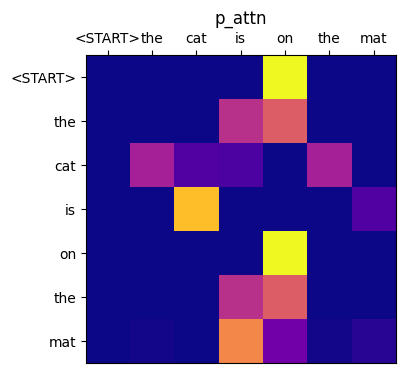

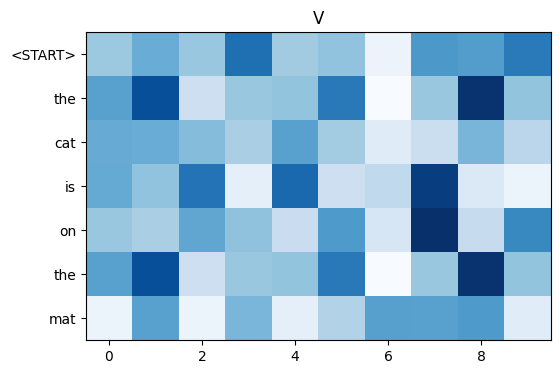

In [15]:
np.random.seed(0)

W_q = np.random.randn(d_model, d_k)
W_k = np.random.randn(d_model, d_k)
W_v = np.random.randn(d_model, d_v)

Q = np.dot(emb_decoder_input, W_q)
K = np.dot(emb_decoder_input, W_k)
V = np.dot(emb_decoder_input, W_v)

p_attn = softmax(np.dot(Q, K.T) / np.sqrt(d_k), axis=1)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(p_attn, aspect='auto', cmap='plasma')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xticks([0,1,2,3,4,5,6], output['tokens'])
ax.set_yticks([0,1,2,3,4,5,6], output['tokens'])
ax.set_title('p_attn')
plt.show()


plt.figure(figsize=(6,4))
plt.imshow(V, aspect='auto', cmap='Blues')
plt.yticks([0,1,2,3,4,5,6], output['tokens'])
plt.title('V')
plt.show()

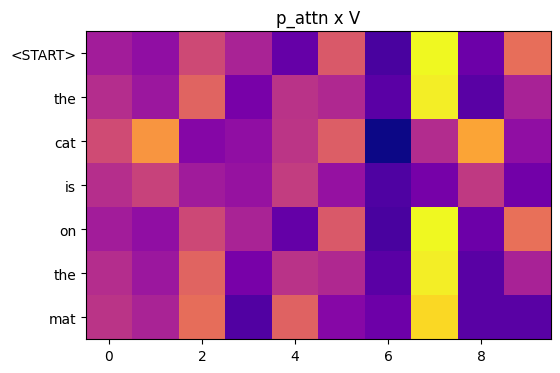

In [16]:
emb_decoder_input_attn = np.dot(p_attn, V)

plt.figure(figsize=(6,4))
plt.imshow(emb_decoder_input_attn, aspect='auto', cmap='plasma')
plt.yticks([0,1,2,3,4,5,6], output['tokens'])
plt.title('p_attn x V')
plt.show()

[[  0. -inf -inf -inf -inf -inf -inf]
 [  0.   0. -inf -inf -inf -inf -inf]
 [  0.   0.   0. -inf -inf -inf -inf]
 [  0.   0.   0.   0. -inf -inf -inf]
 [  0.   0.   0.   0.   0. -inf -inf]
 [  0.   0.   0.   0.   0.   0. -inf]
 [  0.   0.   0.   0.   0.   0.   0.]]


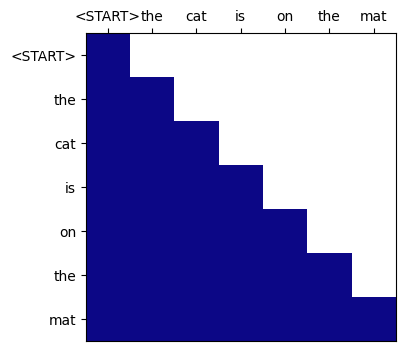

In [17]:
mask = np.triu(np.ones_like(p_attn)).transpose(1, 0)
mask = np.where(mask == 1, 0, -np.inf)
print(mask)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(mask, aspect='auto', cmap='plasma')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xticks([0,1,2,3,4,5,6], output['tokens'])
ax.set_yticks([0,1,2,3,4,5,6], output['tokens'])
plt.show()

In [18]:
np.dot(Q, K.T) / np.sqrt(d_k)

array([[-14.362,  -6.551, -12.69 ,  13.636,  19.247,  -6.551,  -7.055],
       [-29.313,  -5.649,  -9.947,   2.929,   3.239,  -5.649,  -9.005],
       [ -9.786,   3.103,   2.13 ,   2.051,  -2.296,   3.103,  -1.944],
       [  8.861,   0.179,  15.273,  -8.247, -25.581,   0.179,  13.449],
       [ -8.436, -17.811, -18.755,  11.704,  18.593, -17.811,   3.319],
       [-29.313,  -5.649,  -9.947,   2.929,   3.239,  -5.649,  -9.005],
       [  2.666,   4.937,  -0.619,   9.146,   7.979,   4.937,   6.435]])

In [19]:
(np.dot(Q, K.T) / np.sqrt(d_k)) + mask

array([[-14.362,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
       [-29.313,  -5.649,    -inf,    -inf,    -inf,    -inf,    -inf],
       [ -9.786,   3.103,   2.13 ,    -inf,    -inf,    -inf,    -inf],
       [  8.861,   0.179,  15.273,  -8.247,    -inf,    -inf,    -inf],
       [ -8.436, -17.811, -18.755,  11.704,  18.593,    -inf,    -inf],
       [-29.313,  -5.649,  -9.947,   2.929,   3.239,  -5.649,    -inf],
       [  2.666,   4.937,  -0.619,   9.146,   7.979,   4.937,   6.435]])

In [20]:
softmax( (np.dot(Q, K.T) / np.sqrt(d_k)) + mask, axis=1)

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [5.284e-11, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.833e-06, 7.257e-01, 2.743e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.640e-03, 2.781e-07, 9.984e-01, 6.096e-11, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.825e-12, 1.547e-16, 6.022e-17, 1.018e-03, 9.990e-01, 0.000e+00, 0.000e+00],
       [4.205e-15, 7.958e-05, 1.083e-06, 4.229e-01, 5.769e-01, 7.958e-05, 0.000e+00],
       [1.089e-03, 1.055e-02, 4.074e-05, 7.098e-01, 2.209e-01, 1.055e-02, 4.715e-02]])

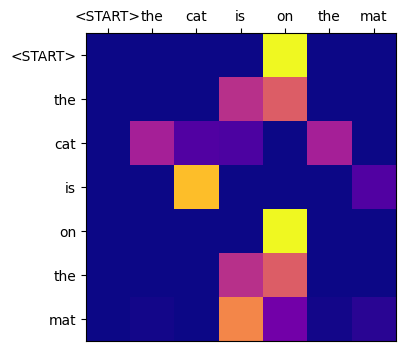

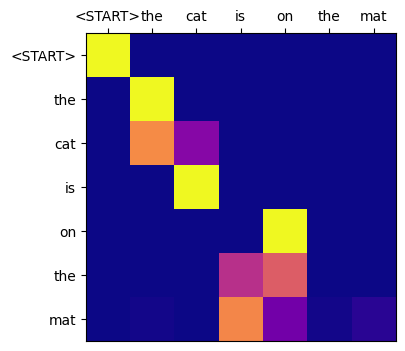

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(p_attn, aspect='auto', cmap='plasma')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xticks([0,1,2,3,4,5,6], output['tokens'])
ax.set_yticks([0,1,2,3,4,5,6], output['tokens'])
plt.show()

p_attn = softmax( (np.dot(Q, K.T) / np.sqrt(d_k)) + mask, axis=1)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(p_attn, aspect='auto', cmap='plasma')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xticks([0,1,2,3,4,5,6], output['tokens'])
ax.set_yticks([0,1,2,3,4,5,6], output['tokens'])
plt.show()

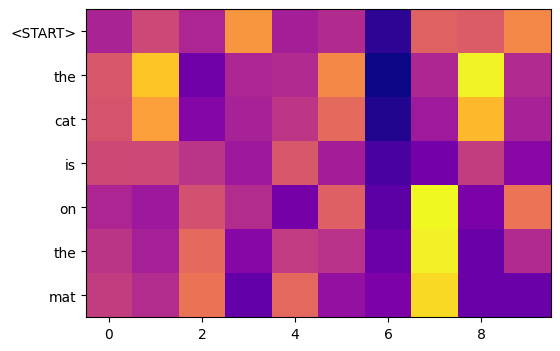

In [22]:
emb_decoder_input_attn = np.dot(p_attn, V)

plt.figure(figsize=(6,4))
plt.imshow(emb_decoder_input_attn, aspect='auto', cmap='plasma')
plt.yticks([0,1,2,3,4,5,6], output['tokens'])
plt.show()

---

# Put it all together: torch.nn.Transformer

In [23]:
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

import pprint, math

In [24]:
class ShiftedIncrementSeqDataset(Dataset):
    # - 입력: 0 1 2 3 4 | 5 6 7 8  9
    # - 출력: 0 1 2 3 4 | 6 7 8 9 10

    def __init__(self, N, V, S):
        # N: 샘플 수
        # V: vocab 수
        # S: 시퀀스 길이
        self.N = N
        self.V = V
        self.S = S

        self.generate_data()

    def generate_data(self):
        data = torch.from_numpy(np.random.randint(1, self.V-1, size=(self.N, self.S))) # 1~9까지 10개
        data.requires_grad = False
        data[:, 0] = 0 # start symbol

        self.src = data.clone() # (N, 10)
        self.tgt = data.clone() # (N, 10)
        # 뒤에 다섯개는 +1
        self.tgt[:, self.V//2:] +=1

    def __len__(self):
        return self.N

    def __getitem__(self, idx):
        return self.src[idx], self.tgt[idx]


def my_collate_fn(mini_batch):
    src = [ d[0] for d in mini_batch]
    tgt_x = [ d[1][:-1] for d in mini_batch]
    tgt_y = [ d[1][1:] for d in mini_batch ]

    # 데이터 셋에는 PAD 토큰이 없고 모두 유효한 토큰이므로
    # 마스크는 모두 False (또는 0) 로!
    # 주의: 마스크를 bool 타입으로 주면
    # False는 마스크하면 안된다는 의미, 즉 유효토큰
    # True는 마스크해야 된다는 의미, 즉 패딩토큰
    src_mask = [ torch.zeros(10).to(torch.bool) for d in mini_batch ]
    tgt_mask = [ torch.zeros(9).to(torch.bool) for d in mini_batch ]

    ret = {
        'input_ids': src,
        'src_attn_mask': src_mask,
        'tgt_x': tgt_x,
        'tgt_attn_mask': tgt_mask,
        'labels': tgt_y
    }

    return ret


In [25]:
D = ShiftedIncrementSeqDataset(3000,
                               11, # 숫자의 최대값 11이니까 10까지
                               10 #  시퀀스길이
                               )
print(len(D))
train_loader = DataLoader(D, batch_size=3, collate_fn=my_collate_fn)
train_loader_iter = iter(train_loader)
data = next(train_loader_iter)
pprint.pprint(data)

3000
{'input_ids': [tensor([0, 5, 3, 3, 2, 1, 1, 3, 9, 4]),
               tensor([0, 9, 9, 2, 1, 6, 9, 3, 4, 6]),
               tensor([0, 9, 7, 5, 7, 4, 7, 3, 7, 6])],
 'labels': [tensor([ 5,  3,  3,  2,  2,  2,  4, 10,  5]),
            tensor([ 9,  9,  2,  1,  7, 10,  4,  5,  7]),
            tensor([9, 7, 5, 7, 5, 8, 4, 8, 7])],
 'src_attn_mask': [tensor([False, False, False, False, False, False, False, False, False, False]),
                   tensor([False, False, False, False, False, False, False, False, False, False]),
                   tensor([False, False, False, False, False, False, False, False, False, False])],
 'tgt_attn_mask': [tensor([False, False, False, False, False, False, False, False, False]),
                   tensor([False, False, False, False, False, False, False, False, False]),
                   tensor([False, False, False, False, False, False, False, False, False])],
 'tgt_x': [tensor([ 0,  5,  3,  3,  2,  2,  2,  4, 10]),
           tensor([ 0,  9,  9, 

In [26]:
def get_positional_encoding(max_seq_length, d_model):
    pe = torch.zeros(max_seq_length, d_model)
    position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1) # (max_seq_length, 1)
    div_term = torch.exp(
        - torch.arange(0, d_model, 2).float() * math.log(10000.0) / d_model
    ) # (d_model // 2, )

    pe[:, 0::2] = torch.sin(position * div_term) # (max_seq_length, d_model // 2)
    pe[:, 1::2] = torch.cos(position * div_term)

    pe = pe.unsqueeze(0)  # (1, max_seq_length, d_model), 모든 샘플에 다 적용 되도록 배차 차원을 삽입
    return pe

$$
\begin{aligned}
\frac{pos}{10000^{2i/d_{\text{model}}}}
&= pos \times \left[ \exp\left\{{\log\left(  \frac{1}{10000^{2i/d_{\text{model}}}}\right)} \right\} \right] \\
&= pos \times \left[ \exp \left\{ \log \left( \left( 10000^{2i/d_{\text{model}}} \right)^{-1}  \right) \right\} \right]\\
&= pos \times \left[ \exp\left\{\log \left( 10000^{-2i/d_{\text{model}}} \right)\right\} \right] \\
&= pos \times \left[ \exp\left\{ -\frac{2i}{d_{\text{model}}} \log(10000) \right\} \right]
\end{aligned}
$$

In [27]:
class TransformerModel(torch.nn.Module):
    def __init__(self, vocab_size,
                 d_model=512, nhead=8,
                 num_encoder_layers=6, num_decoder_layers=6, dim_feedforward=2048,
                 max_seq_length=128):
        super(TransformerModel, self).__init__()

        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.pos_encoder = get_positional_encoding(max_seq_length, d_model)
        self.transformer = torch.nn.Transformer(d_model, nhead,
                                                num_encoder_layers, num_decoder_layers,
                                                dim_feedforward,
                                                batch_first=True)
        self.fc_out = torch.nn.Linear(d_model, vocab_size)

        self.debug = False

    def set_debug(self, flag=False):
        self.debug = flag

    def forward(self, src, tgt, src_mask=None, tgt_mask=None):
        src_emb = self.embedding(src) + self.pos_encoder[:, :src.size(1), :]
        tgt_emb = self.embedding(tgt) + self.pos_encoder[:, :tgt.size(1), :]

        ########################################################################
        # DEBUG CODE
        if self.debug:
            print(src_emb, src_emb.shape)
            print(tgt_emb, tgt_emb.shape)

            encoder_output = self.transformer.encoder(src_emb)
            print("encoder output:", encoder_output, encoder_output.shape)

            decoder_output = self.transformer.decoder(
                tgt_emb, encoder_output, tgt_mask,
                tgt_is_causal=True)
            print("decoder output:", decoder_output, decoder_output.shape)
        ########################################################################

        output = self.transformer(src_emb, tgt_emb,
                                  src_mask=src_mask,
                                  tgt_mask=tgt_mask,
                                  tgt_is_causal=True)

        ########################################################################
        # DEBUG CODE
        if self.debug:
            print("model output: ", output)
        ########################################################################

        output = self.fc_out(output)

        return output


In [28]:
# 하이퍼파라미터 설정
vocab_size = 11 # 0 ~ 10
d_model = 64
nhead = 4
num_encoder_layers = 2
num_decoder_layers = 2
dim_feedforward = 256
max_seq_length = 10

batch_size = 64
num_epochs = 5
learning_rate = 0.001

train_loader = DataLoader(D, batch_size=batch_size, shuffle=True, collate_fn=my_collate_fn)

In [54]:
# 모델 초기화
model = TransformerModel(vocab_size,
                         d_model, nhead, num_encoder_layers, num_decoder_layers,
                         dim_feedforward, max_seq_length)


In [55]:
# generate_square_subsequent_mask 실험
nn.Transformer.generate_square_subsequent_mask(9)

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [56]:
# mask outer 실험
#                   I    love   you    <pad> <pad>
a = torch.tensor([False, False, False, True, True])

torch.outer(a,a)

tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False,  True,  True],
        [False, False, False,  True,  True]])

In [57]:
# reapeat_interleave 실험
b = [ torch.tensor([False, False, False, True, True]),
      torch.tensor([False, False, True, True,True])]

torch.stack([torch.outer(m, m) for m in b])
torch.stack([torch.outer(m, m) for m in b]).repeat_interleave(2, dim=0)

tensor([[[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False,  True,  True],
         [False, False, False,  True,  True]],

        [[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False,  True,  True],
         [False, False, False,  True,  True]],

        [[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False,  True,  True,  True],
         [False, False,  True,  True,  True],
         [False, False,  True,  True,  True]],

        [[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False,  True,  True,  True],
         [False, False,  True,  True,  True],
         [False, False,  True,  True,  True]]])

In [58]:
# 입력 시퀀스를 길이에 따라 정의 (0은 pad 위치)
sequence = ["I", "Love", "You", "<pad>", "<pad>"]
seq_length = len(sequence)

# pad 토큰 위치 지정
pad_mask = torch.tensor([1, 1, 1, 0, 0], dtype=torch.bool)  # 패딩 위치는 0으로 설정
print(pad_mask)

# 마스크 행렬 생성
attention_mask = pad_mask.unsqueeze(0) & pad_mask.unsqueeze(1)

print(attention_mask.int())

tensor([ True,  True,  True, False, False])
tensor([[1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)


In [59]:
src_pad_mask = torch.tensor([1, 1, 1, 0, 0], dtype=torch.bool)  # 패딩 위치는 0으로 설정
print(src_pad_mask)

tgt_pad_mask = torch.tensor([1, 1, 1, 1, 0, 0], dtype=torch.bool)  # 패딩 위치는 0으로 설정
print(tgt_pad_mask )

attention_mask = src_pad_mask.unsqueeze(0) & tgt_pad_mask.unsqueeze(1)

print(attention_mask.int())

tensor([ True,  True,  True, False, False])
tensor([ True,  True,  True,  True, False, False])
tensor([[1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)


In [60]:
# 손실 함수, 옵티마이저 초기화, 학습
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model.train()

# 학습 루프
for epoch in range(num_epochs):
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        # [sample, sample, ..., ] -> tensor
        src = torch.stack(batch['input_ids']).long()
        tgt = torch.stack(batch['tgt_x']).long()
        labels = torch.stack(batch['labels']).long()

        # (N*nhead, S, S)
        # src_mask = torch.stack([torch.outer(m, m) for m in batch['src_attn_mask']])
        # src_mask = src_mask.repeat_interleave(nhead, dim=0)

        # src_mask는 필요 시 생성, mask가 필요 없다면 None로 전달 가능
        src_mask = None  # 필요 없다면 None으로 설정

        # (N*nhead, T, T) 또는 (T, T) 되는데 여기서는 모든 시퀀스에 대해서
        # 동일한 코잘 마스크를 적용할 것이기 때문에 (T, T)
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt.size(1)).to(tgt.device)

        # model forward
        # src_mask, tgt_mask는 attention 스코어에 적용되는 (S,S)모양의 마스크
        # src_mask는 None가 되도 되고, tgt_mask는 tgt_is_causal=True 이므로
        # causal mask가 되어야 함
        output = model(src, tgt, src_mask, tgt_mask)

        # loss           (N, S, V) -> (N*S, V)        (N, S)->(N*S,)
        loss = criterion(output.view(-1, vocab_size), labels.view(-1))

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # 에폭 끝난 후 마지막 샘플에 대한 결과 출력(확인용)
    print("encoder input : ", src[0])
    print("decoder input : ", tgt[0])
    print("decoder output: ", output[0].argmax(dim=-1))
    print("label         : ", labels[0])

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')

encoder input :  tensor([0, 7, 5, 8, 8, 7, 8, 7, 2, 3])
decoder input :  tensor([0, 7, 5, 8, 8, 8, 9, 8, 3])
decoder output:  tensor([8, 8, 8, 8, 8, 8, 8, 8, 8])
label         :  tensor([7, 5, 8, 8, 8, 9, 8, 3, 4])
Epoch [1/5], Loss: 2.1464
encoder input :  tensor([0, 1, 6, 3, 3, 4, 2, 1, 7, 5])
decoder input :  tensor([0, 1, 6, 3, 3, 5, 3, 2, 8])
decoder output:  tensor([6, 6, 3, 3, 3, 2, 2, 6, 6])
label         :  tensor([1, 6, 3, 3, 5, 3, 2, 8, 6])
Epoch [2/5], Loss: 1.4889
encoder input :  tensor([0, 8, 5, 6, 1, 4, 7, 7, 4, 1])
decoder input :  tensor([0, 8, 5, 6, 1, 5, 8, 8, 5])
decoder output:  tensor([8, 5, 6, 1, 5, 8, 8, 5, 2])
label         :  tensor([8, 5, 6, 1, 5, 8, 8, 5, 2])
Epoch [3/5], Loss: 0.4975
encoder input :  tensor([0, 2, 6, 6, 7, 3, 2, 7, 9, 5])
decoder input :  tensor([ 0,  2,  6,  6,  7,  4,  3,  8, 10])
decoder output:  tensor([ 2,  6,  6,  7,  4,  3,  8, 10,  6])
label         :  tensor([ 2,  6,  6,  7,  4,  3,  8, 10,  6])
Epoch [4/5], Loss: 0.1263
encoder i

In [61]:
model.eval()

# nn.Transformer를 encoder, decoder 별로 따로 작동시키고
# 결과를 프린트하고 싶으면 주석 제거
# model.set_debug(True)

src = torch.LongTensor([[0, 3, 4, 5, 6,   8, 7, 2, 9,  7]])
# 정답                   0, 3, 4, 5, 6,   9, 8, 3, 10, 8

src_mask = torch.zeros(1, 10).to(torch.bool)
src_mask = torch.stack( [ torch.outer(src_mask[0], src_mask[0]) ])
src_mask = src_mask.repeat_interleave(nhead, dim=0)
print('src_mask.shape:', src_mask.shape)
# print(src_mask)

# 첫 번째 입력으로 시작 토큰을 설정
tgt = torch.LongTensor([
    [0,]  # 시작 토큰
])

for _ in range(len(src[0])-1):  # 최대 시퀀스 길이만큼 반복, 시작토큰 하나 있기때문에 -1
    # tgt_mask를 (seq_len, seq_len) 크기로 생성
    tgt_mask = torch.zeros(1, len(tgt[0])).to(torch.bool)
    tgt_mask = torch.stack( [ torch.outer(tgt_mask[0], tgt_mask[0]) ])
    tgt_mask = tgt_mask.repeat_interleave(nhead, dim=0)
    # print('tgt_mask.shape:', tgt_mask.shape)

    # https://discuss.pytorch.org/t/transformer-outputs-nan-in-eval-mode/157936
    # 마스크 True, False 반대라는 글
    # 마스크를 반대로 주면 model.eval()모드 후 with torch.no_grad()하면 with 블록안에서 nan뜸
    with torch.no_grad():
        output = model(src, tgt,
                       src_mask = src_mask,
                       tgt_mask = tgt_mask)
        print('output.shape:', output.shape)
        # print("model output: ", output)

        next_token = output[:, -1, :].argmax(dim=-1)  # 마지막 토큰에 대한 예측
        print(next_token)
        tgt = torch.cat([tgt, next_token.unsqueeze(0)], dim=1)  # 새로운 토큰을 디코더 입력에 추가

        # 종료 조건: 모델이 종료 토큰을 생성하면 중지
        # 여기서는 길이 10만큼만 루프를 돌지만
        # 길이가 정해지지 않은 타겟을 생성할 때는
        # end 토큰을 생성하면 생성 루프를 break
        # if next_token.item() == END:  # 종료 토큰에 해당하는 인덱스
        #     break

print("Predicted sequence:", tgt)

src_mask.shape: torch.Size([4, 10, 10])
output.shape: torch.Size([1, 1, 11])
tensor([3])
output.shape: torch.Size([1, 2, 11])
tensor([4])
output.shape: torch.Size([1, 3, 11])
tensor([5])
output.shape: torch.Size([1, 4, 11])
tensor([6])
output.shape: torch.Size([1, 5, 11])
tensor([9])
output.shape: torch.Size([1, 6, 11])
tensor([8])
output.shape: torch.Size([1, 7, 11])
tensor([3])
output.shape: torch.Size([1, 8, 11])
tensor([10])
output.shape: torch.Size([1, 9, 11])
tensor([8])
Predicted sequence: tensor([[ 0,  3,  4,  5,  6,  9,  8,  3, 10,  8]])
